<a href="https://colab.research.google.com/github/alexandrufalk/tensorflow/blob/Master/03_convolutional_neural_networks_and_computer_vision_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get the data

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.
https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/


In [2]:
import zipfile

In [3]:
#Download zip file of pizza_stack images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-04-01 05:15:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   183MB/s    in 0.6s    

2024-04-01 05:15:38 (183 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#Inspect the data

In [4]:
#inspect each of the downloaded directories
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/

pizza  steak


In [6]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [7]:
import os

#Walk through pizza_steak directory and list number of files
for dirpath,dirname,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [8]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [9]:
#Get the class names
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train") #turn training path into a Pythone path
#create a list of class names
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names


array(['pizza', 'steak'], dtype='<U5')

In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Setup targhet directory
  targhet_folder=target_dir+target_class

  #get a random image path
  random_image=random.sample(os.listdir(targhet_folder),1)

  #Read and plot the image
  img=mpimg.imread(targhet_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape:{img.shape}")

  return img

Image shape:(384, 512, 3)


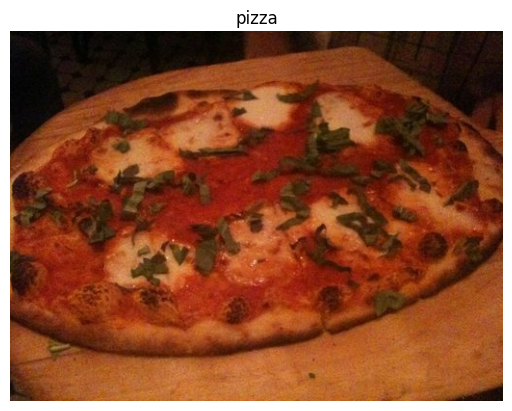

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

array([[[ 4,  5,  0],
        [ 6,  7,  1],
        [ 8,  9,  3],
        ...,
        [23, 16,  8],
        [23, 19, 10],
        [26, 22, 13]],

       [[ 8,  9,  3],
        [ 8,  9,  3],
        [ 8,  9,  3],
        ...,
        [20, 13,  5],
        [19, 12,  4],
        [18, 14,  5]],

       [[15, 14,  9],
        [12, 11,  6],
        [ 9,  8,  4],
        ...,
        [20, 13,  5],
        [19, 12,  4],
        [21, 14,  6]],

       ...,

       [[85, 55, 44],
        [81, 53, 41],
        [70, 40, 29],
        ...,
        [19,  8,  2],
        [18,  7,  1],
        [21, 12,  3]],

       [[79, 47, 36],
        [76, 46, 35],
        [72, 40, 29],
        ...,
        [19, 10,  3],
        [16,  7,  0],
        [18, 11,  3]],

       [[68, 36, 25],
        [71, 39, 28],
        [71, 39, 28],
        ...,
        [21, 12,  7],
        [18, 11,  3],
        [23, 16,  8]]], dtype=uint8)
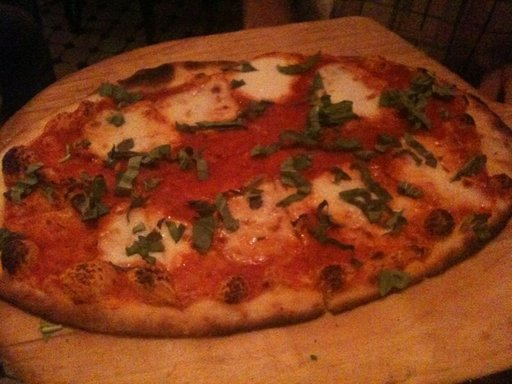

In [12]:
# View the img array/tensor
img


In [13]:
img.shape

(384, 512, 3)

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [14]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.01568627, 0.01960784, 0.        ],
        [0.02352941, 0.02745098, 0.00392157],
        [0.03137255, 0.03529412, 0.01176471],
        ...,
        [0.09019608, 0.0627451 , 0.03137255],
        [0.09019608, 0.0745098 , 0.03921569],
        [0.10196078, 0.08627451, 0.05098039]],

       [[0.03137255, 0.03529412, 0.01176471],
        [0.03137255, 0.03529412, 0.01176471],
        [0.03137255, 0.03529412, 0.01176471],
        ...,
        [0.07843137, 0.05098039, 0.01960784],
        [0.0745098 , 0.04705882, 0.01568627],
        [0.07058824, 0.05490196, 0.01960784]],

       [[0.05882353, 0.05490196, 0.03529412],
        [0.04705882, 0.04313725, 0.02352941],
        [0.03529412, 0.03137255, 0.01568627],
        ...,
        [0.07843137, 0.05098039, 0.01960784],
        [0.0745098 , 0.04705882, 0.01568627],
        [0.08235294, 0.05490196, 0.02352941]],

       ...,

       [[0.33333333, 0.21568627, 0.17254902],
        [0.31764706, 0.20784314, 0.16078431],
        [0.2745098 , 0

# A (typical) architecture of a convolutional neural network
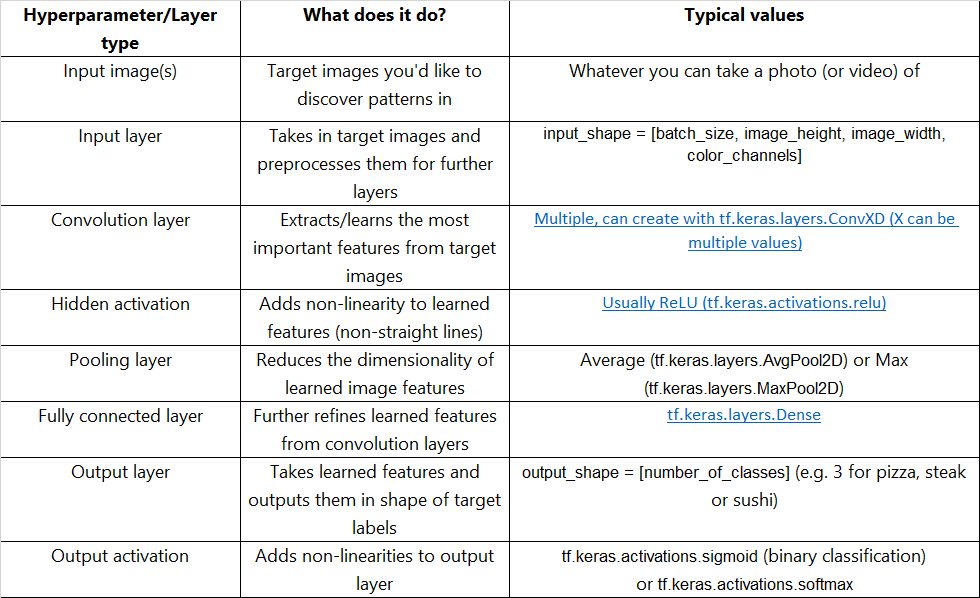



In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Creating the model
#Set random seeds
tf.random.set_seed(42)

#Preprocess data (scaling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Setup the training and test directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224), #convert images to 224*224
                                             class_mode='binary', #type of the problem working ok
                                              batch_size=32, # nr of images to process at a time
                                             seed=42
                                             )
valid_data=valid_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)
# Creating a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)

model1=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                   kernel_size=3,
                                                   activation='relu',
                                                   input_shape=(224,224,3)), # first layer specifies input shape (height, width, colour channels)

                            tf.keras.layers.Conv2D(10,3,activation="relu"),
                            tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                                                      padding='valid'), # padding can also be 'same'
                            tf.keras.layers.Conv2D(10,3,activation='relu'),
                            tf.keras.layers.Conv2D(10,3,activation='relu'),
                            tf.keras.layers.MaxPool2D(2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1,activation='sigmoid') #binary activation output
                            ])
#Compile the model
model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#fit the mode
history1=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 158ms/step - loss: 0.6261 - accuracy: 0.6460 - val_loss: 0.5361 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.5158 - accuracy: 0.7660 - val_loss: 0.4367 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4540 - accuracy: 0.7947 - val_loss: 0.3652 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3607 - accuracy: 0.8440 - val_loss: 0.3481 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.2900 - accuracy: 0.8920 - val_loss: 0.3476 - val_accuracy: 0.8520


In [17]:
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# Comparison with a binary classification model

---



In [18]:
#Set random seeds
tf.random.set_seed(42)

#Create the model
model2=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 116ms/step - loss: 1.0377 - accuracy: 0.5560 - val_loss: 0.6876 - val_accuracy: 0.5540
Epoch 2/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6487 - accuracy: 0.6560 - val_loss: 0.6183 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6123 - accuracy: 0.7327 - val_loss: 0.6044 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.5976 - accuracy: 0.7360 - val_loss: 0.5895 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.5862 - accuracy: 0.7460 - val_loss: 0.5717 - val_accuracy: 0.7640


In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 120ms/step - loss: 4.3462 - accuracy: 0.6087 - val_loss: 2.5345 - val_accuracy: 0.5820
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.7341 - accuracy: 0.7233 - val_loss: 0.7229 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.8532 - accuracy: 0.6840 - val_loss: 0.5702 - val_accuracy: 0.7380
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6322 - accuracy: 0.7533 - val_loss: 0.6919 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.7083 - accuracy: 0.7453 - val_loss: 0.4452 - val_accuracy: 0.7940


#Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

#1. Import and become one with the data

Image shape:(382, 512, 3)
Image shape:(512, 383, 3)


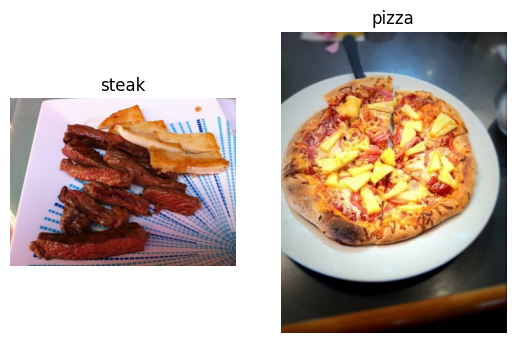

In [21]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# 2. Preprocess the data (prepare it for a model)

In [22]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [26]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [27]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

# 3. Create a model (start with a baseline)

 Note: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [28]:
# Make the creation of model easear
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam


In [29]:
# Creating the model
model4=Sequential([Conv2D(filters=10, #filter is the number of sliding windows going across an input (higher=more complex model)
                          kernel_size=3, #the size of the sliding window going across an input
                          strides=1,#the size of the step the sliding window takes across an input
                          padding='valid', #if same , output shape is same as input shape, if valid output shape gets compressed
                          activation='relu',
                          input_shape=(224,224,3)),#input layer (specify input shape)
                   Conv2D(10,3,activation='relu'),
                   Conv2D(10,3,activation='relu'),
                   Flatten(),
                   Dense(1,activation='sigmoid') #output Layer (specify output shape)
                   ])

 some of the components of the Conv2D layer:

The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.

**filters** - these are the number of "feature extractors" that will be moving over our images.
**kernel_size **- the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.

**stride** - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.

**padding** - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.


In [30]:
# Compile the model
model4.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [31]:

# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

#4 Fit the model

In [32]:
# Fit the model
history_4 = model4.fit(train_data, #this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 128ms/step - loss: 1.2696 - accuracy: 0.6040 - val_loss: 0.7086 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.5048 - accuracy: 0.7747 - val_loss: 0.4820 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.2997 - accuracy: 0.8907 - val_loss: 0.4252 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.1651 - accuracy: 0.9620 - val_loss: 0.6285 - val_accuracy: 0.7140
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.0855 - accuracy: 0.9813 - val_loss: 0.4720 - val_accuracy: 0.7760


#5. Evaluate the model

<Axes: >

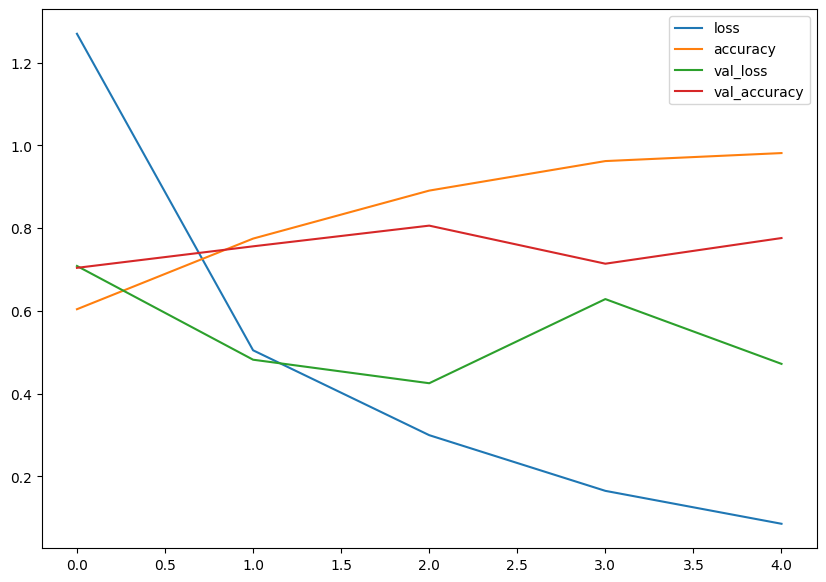

In [33]:
#Plot the trining curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

 **Note**: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [38]:
range(len(history_4.history['loss']))

range(0, 5)

In [41]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss=history.history['loss']
  val_loss=history.history["val_loss"]

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  #Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('Loss')
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()


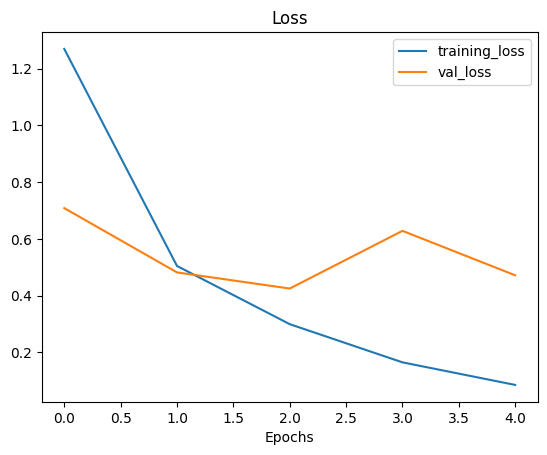

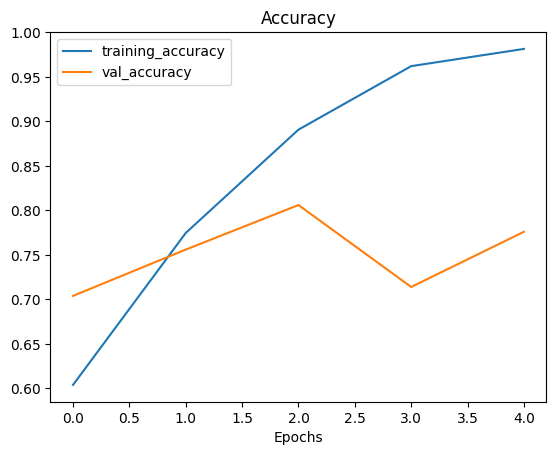

In [42]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)